In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/milknew.csv')
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [ ]:
df.size

8472

In [ ]:
df.shape

(1059, 8)

In [ ]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [ ]:
df['Taste'].unique()

array([1, 0])

In [ ]:
df['Odor'].unique()

array([0, 1])

In [ ]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

<ipython-input-13-a8d1cc243887>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap= 'jet', annot = True)


<Axes: >

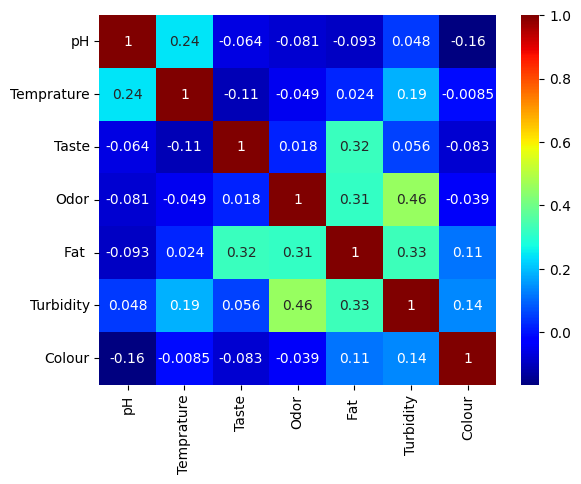

In [ ]:
sns.heatmap(df.corr(), cmap= 'jet', annot = True)

# Now, our target variable is a categorical value, so we need to encode it such that it is numerical before we begin training

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
label_encoder = preprocessing.LabelEncoder()
df['Grade']= label_encoder.fit_transform(df['Grade'])
df['Grade'].unique()

array([0, 1, 2])

In [ ]:
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


In [ ]:
milk_features = ['pH', 'Temprature', 'Taste', 'Fat ', 'Odor', 'Turbidity', 'Colour']
x = df[milk_features]
y = df['Grade']

In [ ]:
x

,pH,Temprature,Taste,Fat,Odor,Turbidity,Colour
0,6.6,35,1,1,0,0,254
1,6.6,36,0,0,1,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,0,1,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,0,1,0,247
1055,6.7,38,1,1,0,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,1,0,0,250


In [ ]:
y

0       0
1       0
2       1
3       1
4       2
       ..
1054    2
1055    0
1056    1
1057    0
1058    1
Name: Grade, Length: 1059, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

In [ ]:
x_train.head()

,pH,Temprature,Taste,Fat,Odor,Turbidity,Colour
226,6.8,40,1,1,0,0,245
782,4.5,60,0,1,1,1,250
889,6.8,45,1,1,1,1,245
573,6.8,41,0,1,0,0,255
333,6.6,37,1,1,1,1,255


## Decision Tree Model Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(x_train, y_train)

In [ ]:
y_pred = dt_clf.predict(x_test)
print(y_pred)

[1 0 1 2 0 2 1 2 1 2 1 0 2 1 0 1 1 1 1 1 2 1 0 1 1 1 2 1 0 1 1 1 2 2 1 1 1
 2 2 0 2 0 1 1 1 1 1 2 1 2 1 2 1 1 2 1 1 2 1 1 2 2 1 1 2 0 0 1 2 1 1 1 1 0
 2 0 2 1 2 1 2 1 0 0 1 0 0 1 1 2 1 2 1 2 0 2 0 2 2 1 2 2 2 1 2 2 0 2 0 1 1
 2 1 2 0 0 0 2 1 1 2 1 1 0 0 0 1 2 2 0 0 0 0 1 0 2 2 2 1 2 2 1 1 1 1 0 2 0
 1 0 0 2 2 0 1 2 1 0 2 1 0 0 2 2 0 1 2 0 1 1 1 2 2 2 2 0 0 1 1 1 2 0 1 1 2
 1 1 1 0 1 0 1 0 2 0 1 2 2 1 0 1 2 2 1 2 2 2 1 0 1 0 1]


In [ ]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred) )

Accuracy:  1.0


# Random Forest Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(x_train, y_train)

In [ ]:
y_pred = rf_clf.predict(x_test)
print(y_pred)

[1 0 1 2 0 2 1 2 1 2 1 0 2 1 0 1 1 1 1 1 2 1 0 1 1 1 2 1 0 1 1 1 2 2 1 1 1
 2 2 0 2 0 1 1 1 1 1 2 1 2 1 2 1 1 2 1 1 2 1 1 2 2 1 1 2 0 0 1 2 1 1 1 1 0
 2 0 2 1 2 1 2 1 0 0 1 0 0 1 1 2 1 2 1 2 0 2 0 2 2 1 2 2 2 1 2 2 0 2 0 1 1
 2 1 2 0 0 0 2 1 1 2 1 1 0 0 0 1 2 2 0 0 0 0 1 0 2 2 2 1 2 2 1 1 1 1 0 2 0
 1 0 0 2 2 0 1 2 1 0 2 1 0 0 2 2 0 1 2 0 1 1 1 2 2 2 2 0 0 1 1 1 2 0 1 1 2
 1 1 1 0 1 0 1 0 2 0 1 2 2 1 0 1 2 2 1 2 2 2 1 0 1 0 1]


In [ ]:
print("Random Forest Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Random Forest Accuracy:  1.0


# KNN Model Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf = knn_clf.fit(x_train, y_train)

In [ ]:
y_pred = knn_clf.predict(x_test)
y_pred

array([1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0,
       0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1,
       1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1,
       1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2, 0,
       1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0,
       0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2,
       1, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 1, 0, 1])

In [ ]:
print("K-Nearest-Neighbors Accuracy: ", metrics.accuracy_score(y_test, y_pred))

K-Nearest-Neighbors Accuracy:  0.9952830188679245


In [ ]:
import pickle

In [ ]:
pickle.dump(dt_clf, open('knn_clf.pkl', 'wb'))